In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
caminho_2019 = "../dados/obitos-2019.csv"
caminho_2020 = "../dados/obitos-2020.csv"

In [ ]:
dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)

In [ ]:
print(f"2019 {dados_2019.shape}")
print(f"2020 {dados_2020.shape}")

In [ ]:
dados_2019.head()

In [ ]:
dados_2020.sample(5)

In [ ]:
len(dados_2020['uf'].unique())

In [ ]:
dados_2020['tipo_doenca'].unique()

In [ ]:
dados_2019['tipo_doenca'].value_counts()

In [ ]:
dados_2020['tipo_doenca'].value_counts()

In [ ]:
total_obitos_2019 = dados_2019.groupby('tipo_doenca')['total'].sum()
total_obitos_2020 = dados_2020.groupby('tipo_doenca')['total'].sum()

In [ ]:
total_obitos_2019

In [ ]:
total_obitos_2020

In [ ]:
proporcao = (total_obitos_2020 / total_obitos_2019)
proporcao

In [ ]:
def grafico_comparativo(causa):

    total_2019 = dados_2019.groupby('tipo_doenca')['total'].sum()
    total_2020 = dados_2020.groupby('tipo_doenca')['total'].sum()
    
    lista = [total_2019.loc[causa], total_2020.loc[causa]]

    dados = pd.DataFrame({'Total': lista,
                           'Ano': [2019,2020]})

    plt.figure(figsize=(8,6))
    sns.barplot(x ='Ano', y ='Total', data = dados)
    plt.title(f'Obitos por {causa}')
    plt.show()
    return dados


In [ ]:
grafico_comparativo('INDETERMINADA')

In [ ]:
total_obitos_2019.loc["SRAG"]

## Desafio 01: Acessar o portal e verificar como são classificados os dados

## Desafio 02: Corrigir o erro do Thiago

In [ ]:
dados_2020.groupby(['tipo_doenca'])['total'].sum()

## Desafio 03: Explorar os outros campos da base

## Desafio 04: Adinionar na função a opção de filtrar por estado

In [ ]:
def desafio_grafico_comparativo(causa, uf='BRASIL'):

    if uf == 'BRASIL':
        total_2019 = dados_2019.groupby(['tipo_doenca'])['total'].sum()
        total_2020 = dados_2020.groupby(['tipo_doenca'])['total'].sum()
        lista = [total_2019.loc[causa], total_2020.loc[causa]]

    else:
        total_2019 = dados_2019.groupby(['uf','tipo_doenca'])['total'].sum()
        total_2020 = dados_2020.groupby(['uf','tipo_doenca'])['total'].sum()
        
        lista = [total_2019.loc[uf.upper(), causa], total_2020.loc[uf.upper(), causa]]

    dados = pd.DataFrame({'Total': lista,
                           'Ano': [2019,2020]})

    plt.figure(figsize=(8,6))
    sns.barplot(x ='Ano', y ='Total', data = dados)
    plt.title(f'Obitos por {causa} - {uf.upper()}')
    plt.show()

    return dados

In [ ]:
desafio_grafico_comparativo('SRAG', 'sp')

## Desafio 05: Entender como funciona uma aplicação web

## Desafio 06: Melhorar a função para aceitar apenas o estado

In [49]:
def desafio_06_grafico_comparativo(causa, uf='BRASIL'):

    if uf == 'BRASIL' and causa !='':
        total_2019 = dados_2019.groupby(['tipo_doenca'])['total'].sum()
        total_2020 = dados_2020.groupby(['tipo_doenca'])['total'].sum()
        lista = [total_2019.loc[causa], total_2020.loc[causa]]

    elif causa != '' and uf != '':
        total_2019 = dados_2019.groupby(['uf','tipo_doenca'])['total'].sum()
        total_2020 = dados_2020.groupby(['uf','tipo_doenca'])['total'].sum()
        
        lista = [total_2019.loc[uf.upper(), causa], total_2020.loc[uf.upper(), causa]]
    
    elif causa == '' and uf != '':
        total_2019 = dados_2019.groupby(['uf'])['total'].sum()
        total_2020 = dados_2020.groupby(['uf'])['total'].sum()
        
        lista = [total_2019.loc[uf.upper()], total_2020.loc[uf.upper()]]

    dados = pd.DataFrame({'Total': lista,
                           'Ano': [2019,2020]})

    plt.figure(figsize=(8,6))
    sns.barplot(x ='Ano', y ='Total', data = dados)
    plt.title(f'Obitos por {causa} - {uf.upper()}')
    plt.show()

    return dados

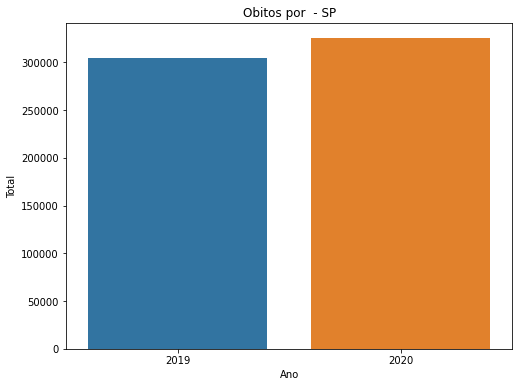

,Total,Ano
0,304147,2019
1,325235,2020


In [50]:
desafio_06_grafico_comparativo('','SP')

In [ ]:
total_2019 = dados_2019.groupby(['uf'])['total'].sum()
total_2020 = dados_2020.groupby(['uf'])['total'].sum()

## Desafio 07: Estudar a documentação do streamlit

## Desafio 08: Ler sobre os comandos mágicos do streamlit

## Desafio 09: Resolver o problema d eplot do seaborn no streamlit

## Desafio 10: Tornar o plot do dataframe opcional

## Desafio 11: Ler sobre o st.cache e o fluxo de execução no streamlit